Explain how I cleaned the raw data

# Read data from the cleaned CVS file into a Pandas Data frame.

In [2]:
import pandas
train_times = pandas.read_csv('clean_data.csv')

In [3]:
inter_urban = ['Gympie', 'Gold Coast', 'Rosewood']

def ontime_percentage(group) :
    trips_with_arrive = group[group.arrival_delay.notnull()]
    if len(trips_with_arrive) :
        ontime_trips = trips_with_arrive[(trips_with_arrive.arrival_delay < 240) | ((trips_with_arrive.line.isin(inter_urban) & (trips_with_arrive.arrival_delay < 360)))]
        return 100 * len(ontime_trips) / len(trips_with_arrive)
    else :
        return float("NaN")

# Convert between different Date/time formats.

In [4]:
def convert_timestamp(series) :
    return pandas.to_datetime(series, unit='s', utc=True).dt.tz_convert(tz='Australia/Brisbane')

train_times['arrival_time'] =convert_timestamp(train_times.arrival_timestamp)
train_times['departure_time'] =convert_timestamp(train_times.departure_timestamp)

In [5]:
train_times

,line,trip_id,stop_name,arrival_timestamp,arrival_delay,departure_timestamp,departure_delay,arrival_time,departure_time
0,Airport,23662740-QR 22_23-32817-DS34,Bowen Hills,1.678659e+09,0.0,1.678659e+09,0.0,2023-03-13 08:08:00+10:00,2023-03-13 08:08:00+10:00
1,Airport,23662740-QR 22_23-32817-DS34,Bowen Hills,1.678745e+09,55.0,1.678745e+09,124.0,2023-03-14 08:08:55+10:00,2023-03-14 08:10:04+10:00
2,Airport,23662740-QR 22_23-32817-DS34,Bowen Hills,1.678832e+09,67.0,1.678832e+09,152.0,2023-03-15 08:09:07+10:00,2023-03-15 08:10:32+10:00
3,Airport,23662740-QR 22_23-32817-DS34,Bowen Hills,1.678918e+09,0.0,1.678918e+09,87.0,2023-03-16 08:08:00+10:00,2023-03-16 08:09:27+10:00
4,Airport,23662742-QR 22_23-32817-DS40,Bowen Hills,1.678661e+09,0.0,1.678661e+09,0.0,2023-03-13 08:38:00+10:00,2023-03-13 08:38:00+10:00
...,...,...,...,...,...,...,...,...,...
136710,Doomben,23662961-QR 22_23-32817-TB11,Doomben,1.678746e+09,348.0,1.678746e+09,348.0,2023-03-14 08:21:48+10:00,2023-03-14 08:21:48+10:00
136711,Doomben,23662961-QR 22_23-32817-TB11,Doomben,1.678832e+09,323.0,1.678832e+09,323.0,2023-03-15 08:21:23+10:00,2023-03-15 08:21:23+10:00
136712,Doomben,23662961-QR 22_23-32817-TB11,Doomben,1.678919e+09,124.0,1.678919e+09,124.0,2023-03-16 08:18:04+10:00,2023-03-16 08:18:04+10:00
136713,Doomben,23663413-QR 22_23-32818-DB09,Doomben,1.679003e+09,211.0,1.679003e+09,211.0,2023-03-17 07:49:31+10:00,2023-03-17 07:49:31+10:00


# 1. What is the overall on-time running% for the week?

In [6]:
ontime_percentage(train_times)

92.76477096041144

# 2. What is the on-time running for each train line?

line
Airport        85.653838
Beenleigh      93.871749
Caboolture     90.609391
Cleveland      92.963926
Doomben        93.108637
Ferny Grove    93.749478
Gold Coast     93.525908
Gympie         79.159664
Ipswich        92.424242
Nambour        87.265048
Redcliffe      94.116848
Rosewood       98.378777
Shorncliffe    92.827710
Springfield    93.973237
dtype: float64

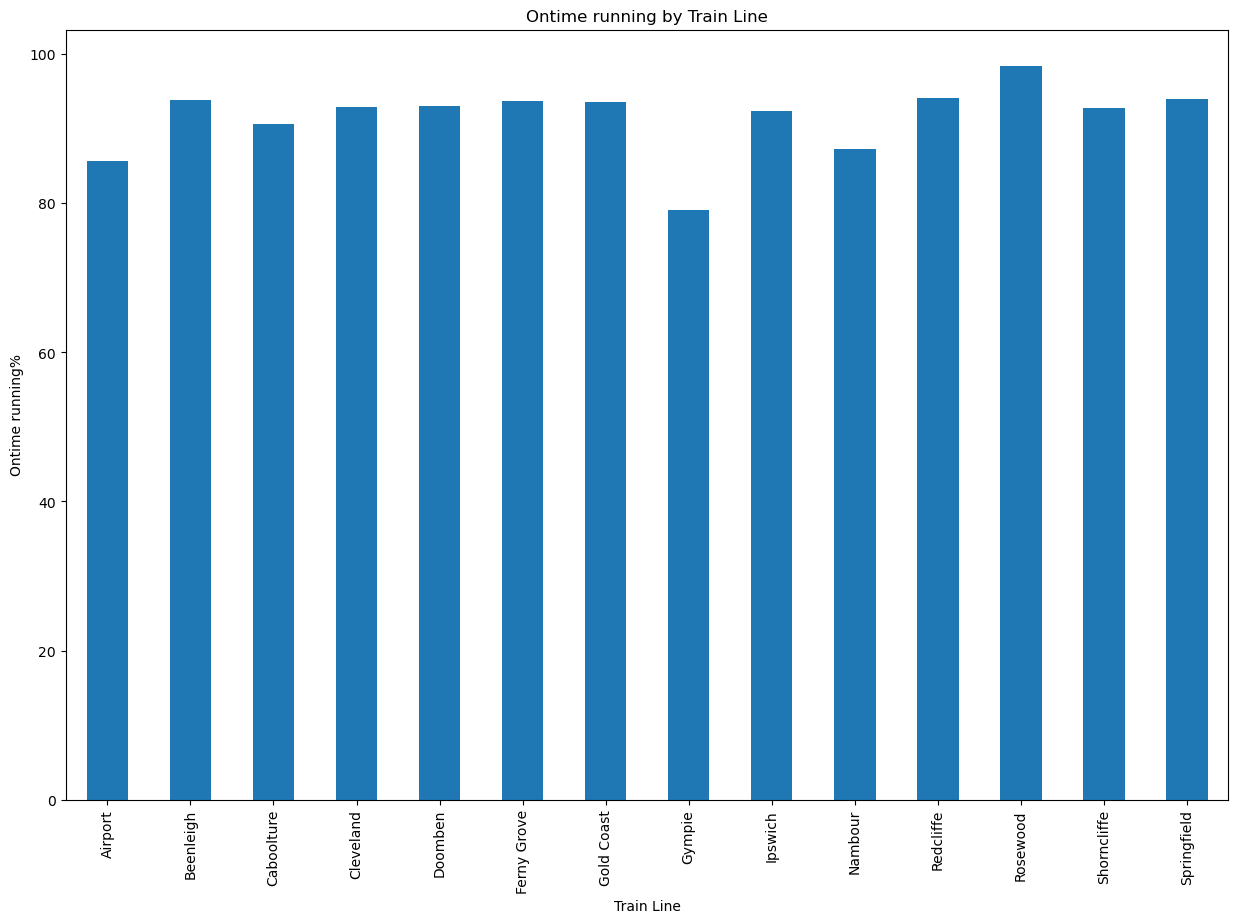

In [7]:
ontime_by_line = train_times.groupby('line').apply(ontime_percentage)

ontime_by_line.plot.bar(figsize=(15,10), title='Ontime running by Train Line', xlabel='Train Line', ylabel='Ontime running%')
ontime_by_line

# 3. What is the on-time running on each date?

arrival_time
2023-03-13    89.635069
2023-03-14    94.244604
2023-03-15    94.645407
2023-03-16    94.771058
2023-03-17    92.465659
2023-03-18    90.655466
2023-03-19    91.609695
dtype: float64

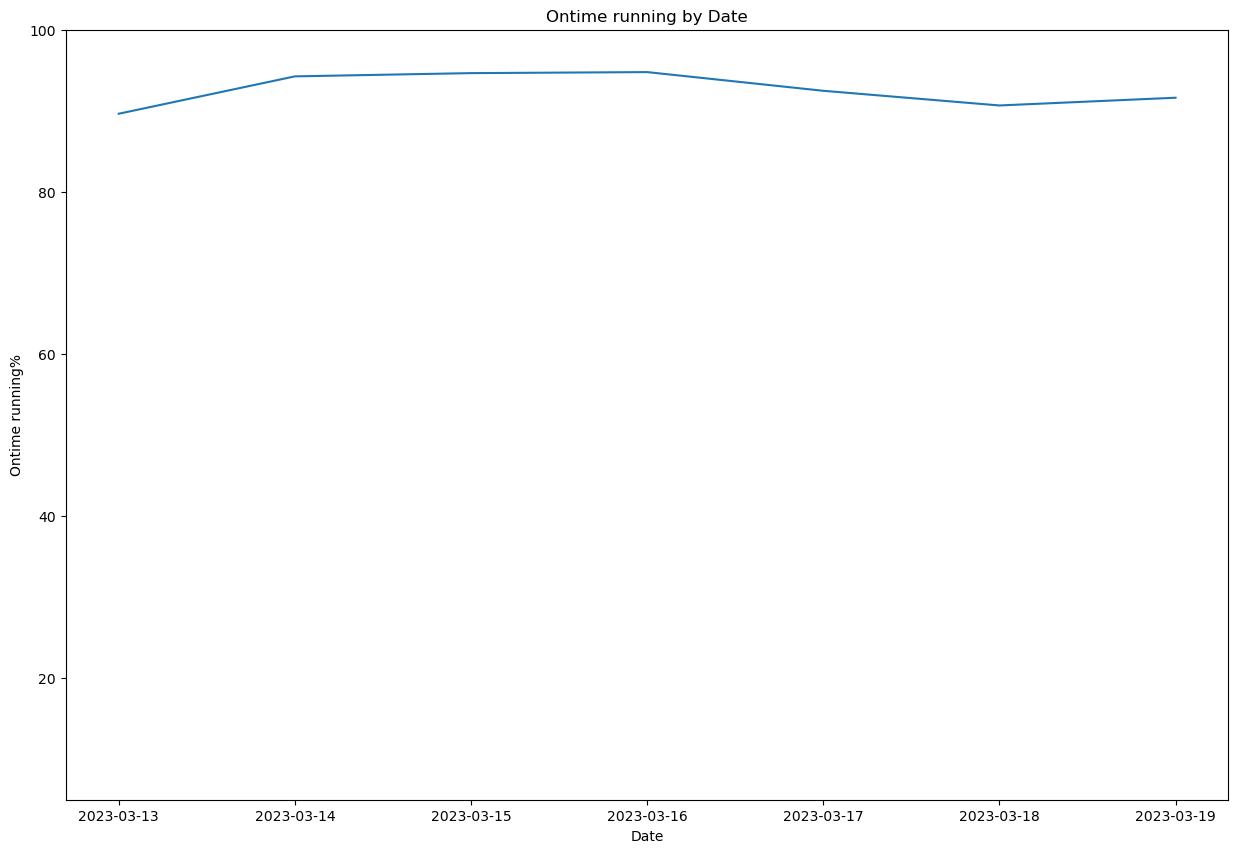

In [8]:
ontime_by_day = train_times.groupby(train_times.arrival_time.dt.date).apply(ontime_percentage)
ontime_by_day.plot(figsize=(15,10), title='Ontime running by Date', xlabel='Date', ylabel='Ontime running%', ylim=(5,100))
ontime_by_day

# 4. What is the on-time running for each hour of day (0 to 23)?

arrival_time
0.0     96.899606
1.0     98.597627
2.0     80.555556
3.0     96.774194
4.0     98.485891
5.0     98.728448
6.0     98.010090
7.0     95.895817
8.0     88.716433
9.0     88.529887
10.0    87.177792
11.0    93.064148
12.0    92.873158
13.0    93.562300
14.0    94.754306
15.0    93.003534
16.0    92.952775
17.0    91.598060
18.0    90.585879
19.0    90.781050
20.0    90.252333
21.0    92.499520
22.0    91.679811
23.0    95.008350
dtype: float64

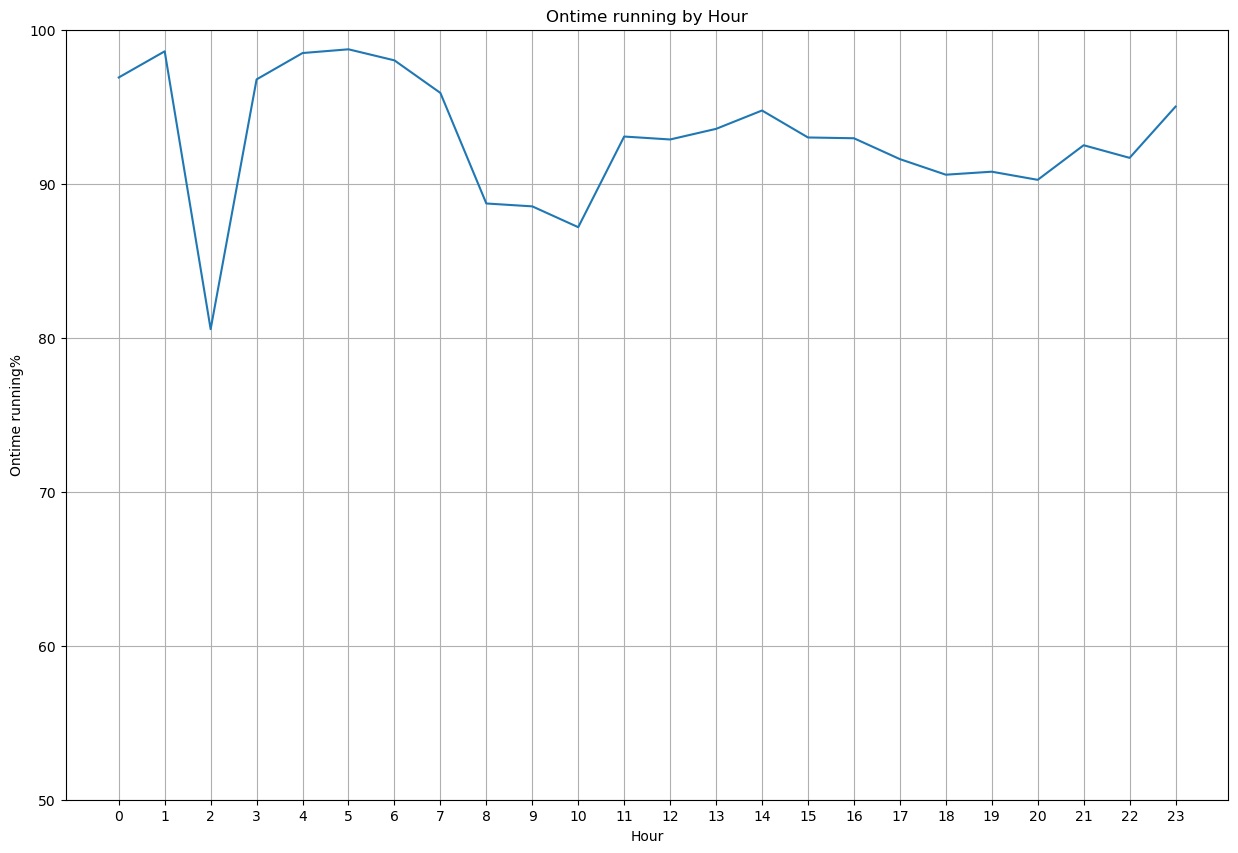

In [9]:
ontime_by_day = train_times.groupby(train_times.arrival_time.dt.hour).apply(ontime_percentage)
ontime_by_day.plot(figsize=(15,10), title='Ontime running by Hour', xlabel='Hour', ylabel='Ontime running%', ylim=(50,100), xticks=range(0,24), grid=True)
ontime_by_day

# 5. What is the on-time running for each stop on the Ferny Grove line?

stop_name
Alderley            96.140749
Bowen Hills         93.617021
Central             88.279773
Enoggera            96.140749
Ferny Grove         85.201794
Fortitude Valley    90.395480
Gaythorne           96.367764
Grovely             93.325662
Keperra             93.440736
Mitchelton          94.016110
Newmarket           95.573212
Oxford Park         94.009217
Park Road           94.285714
Roma Street         88.421053
South Bank          94.285714
South Brisbane      94.117647
Wilston             96.594779
Windsor             95.686720
dtype: float64

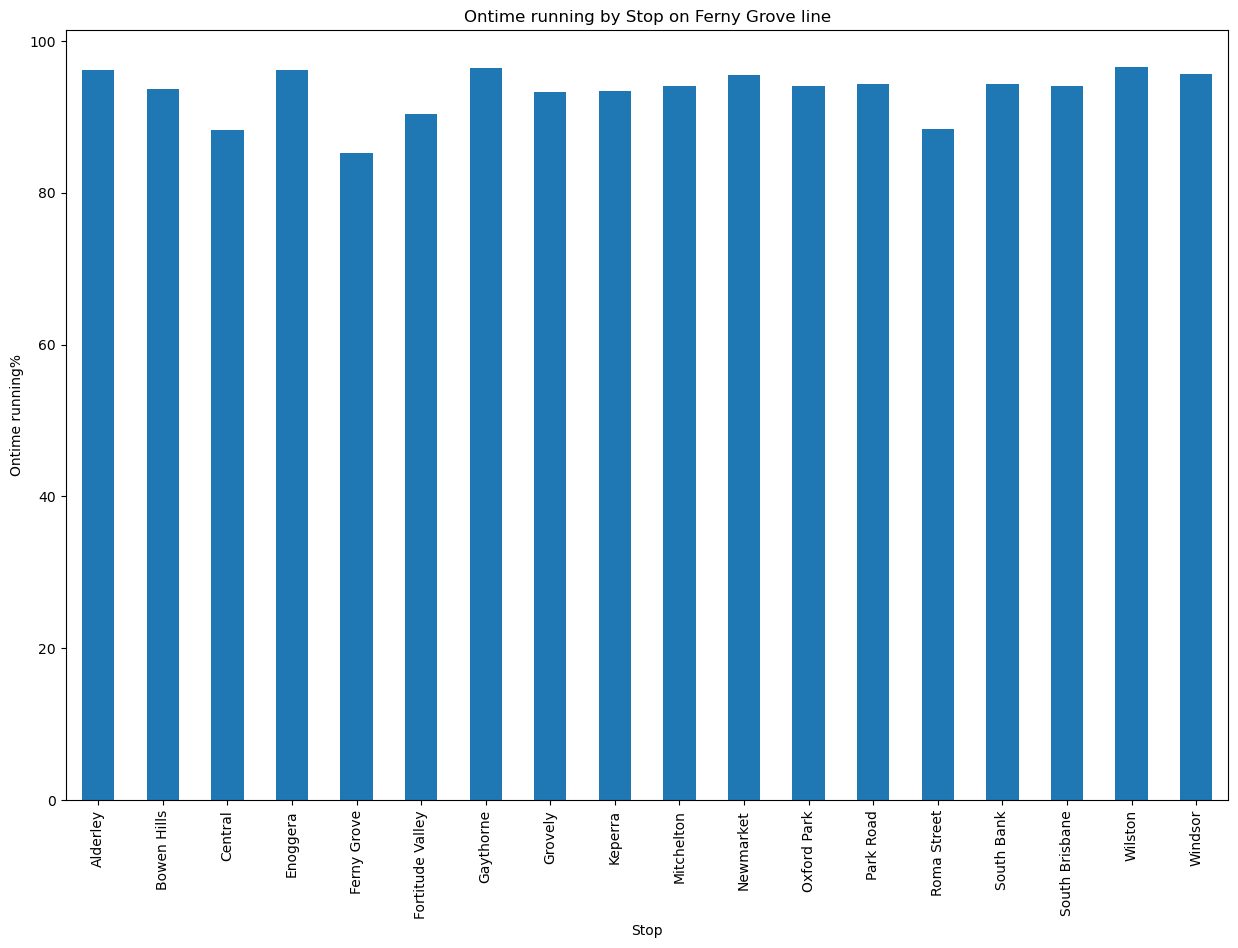

In [10]:
ferny_grove = train_times[train_times.line == 'Ferny Grove']
ontime_by_stop = ferny_grove.groupby(ferny_grove.stop_name).apply(ontime_percentage)
ontime_by_stop.plot.bar(figsize=(15,10), title='Ontime running by Stop on Ferny Grove line', xlabel='Stop', ylabel='Ontime running%')
ontime_by_stop

# 6. What are the weekday peak hours? 

Compute the number of distinct trips in operation during each hour of day on weekdays (i.e. excluding the weekend). 

When do the morning peak hours appear to start and end? When do the afternoon peak hours appear to start and end?

arrival_time
0      36
1       5
3       4
4      65
5     152
6     229
7     278
8     263
9     200
10    166
11    151
12    159
13    160
14    162
15    187
16    244
17    266
18    232
19    189
20    138
21    119
22    124
23    113
Name: trip_id, dtype: int64

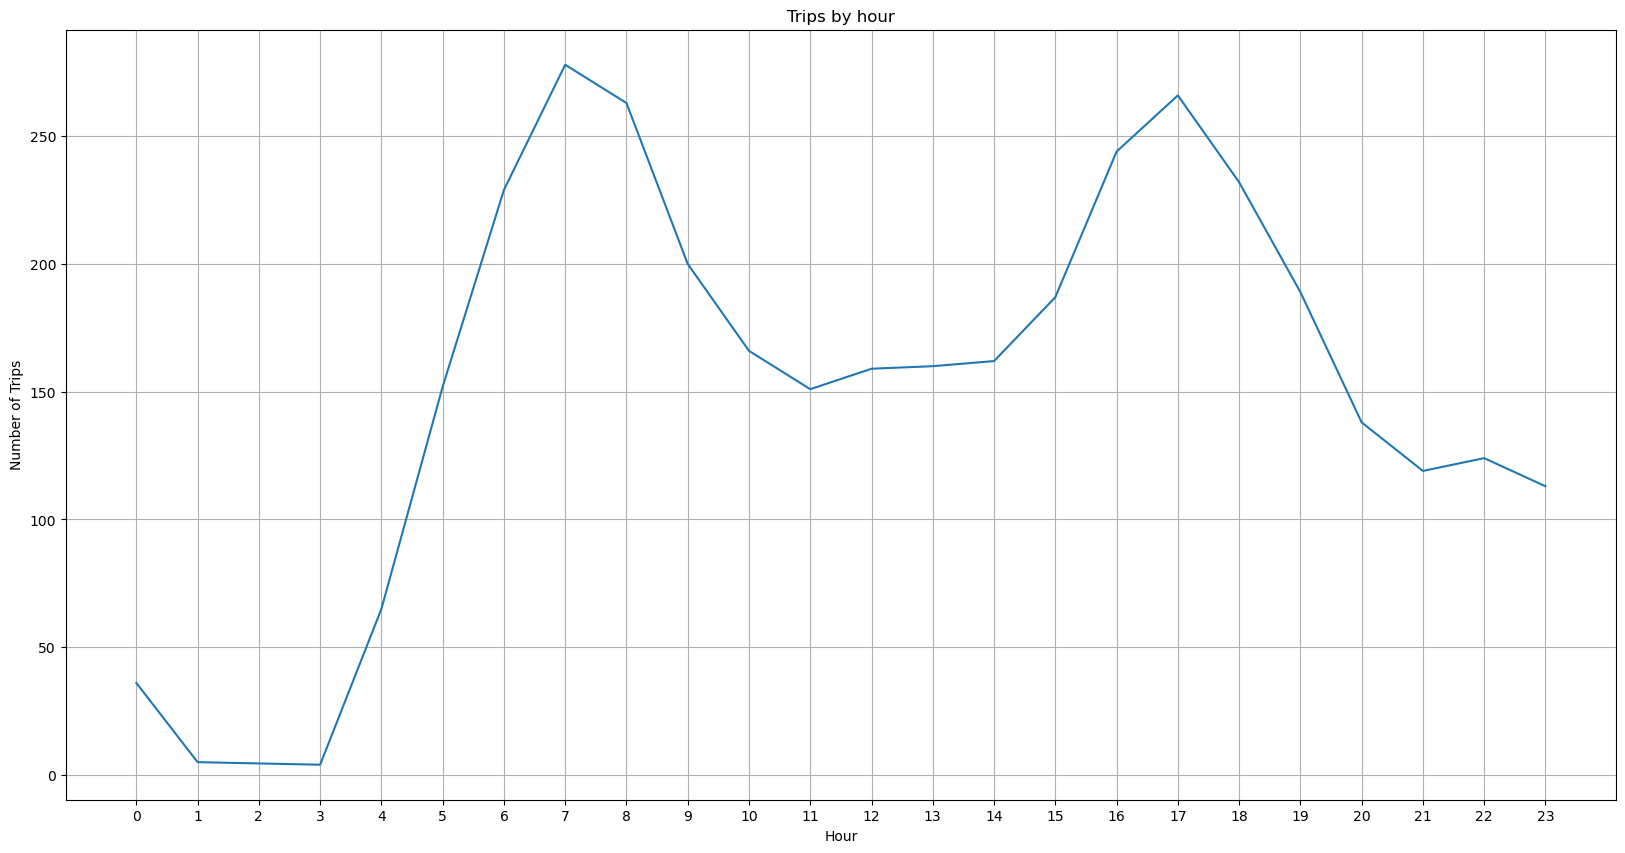

In [11]:
saturday = 5
weekdays = train_times[train_times.arrival_time.dt.day_of_week < saturday]

trips_by_hour = weekdays.groupby(weekdays.arrival_time.dt.hour).trip_id.nunique()
plot = trips_by_hour.plot(figsize=(20,10), title='Trips by hour', xlabel='Hour', ylabel='Number of Trips', grid=True)
plot.set_xticks(range(24)) 

trips_by_hour

# 7. What is the on-time running during the morning and afternoon peak hours?

In [12]:
import datetime
morning_peak = weekdays[weekdays.arrival_time.dt.time.between(datetime.time(5,30), datetime.time(8,30))]
ontime_percentage(morning_peak)

95.67242281527996

In [13]:
afternoon_peak = weekdays[weekdays.arrival_time.dt.time.between(datetime.time(15,30), datetime.time(18,30))]
ontime_percentage(afternoon_peak)

92.65370261245334

# 8. Create a box plot to summarize the departure delays for each train line.

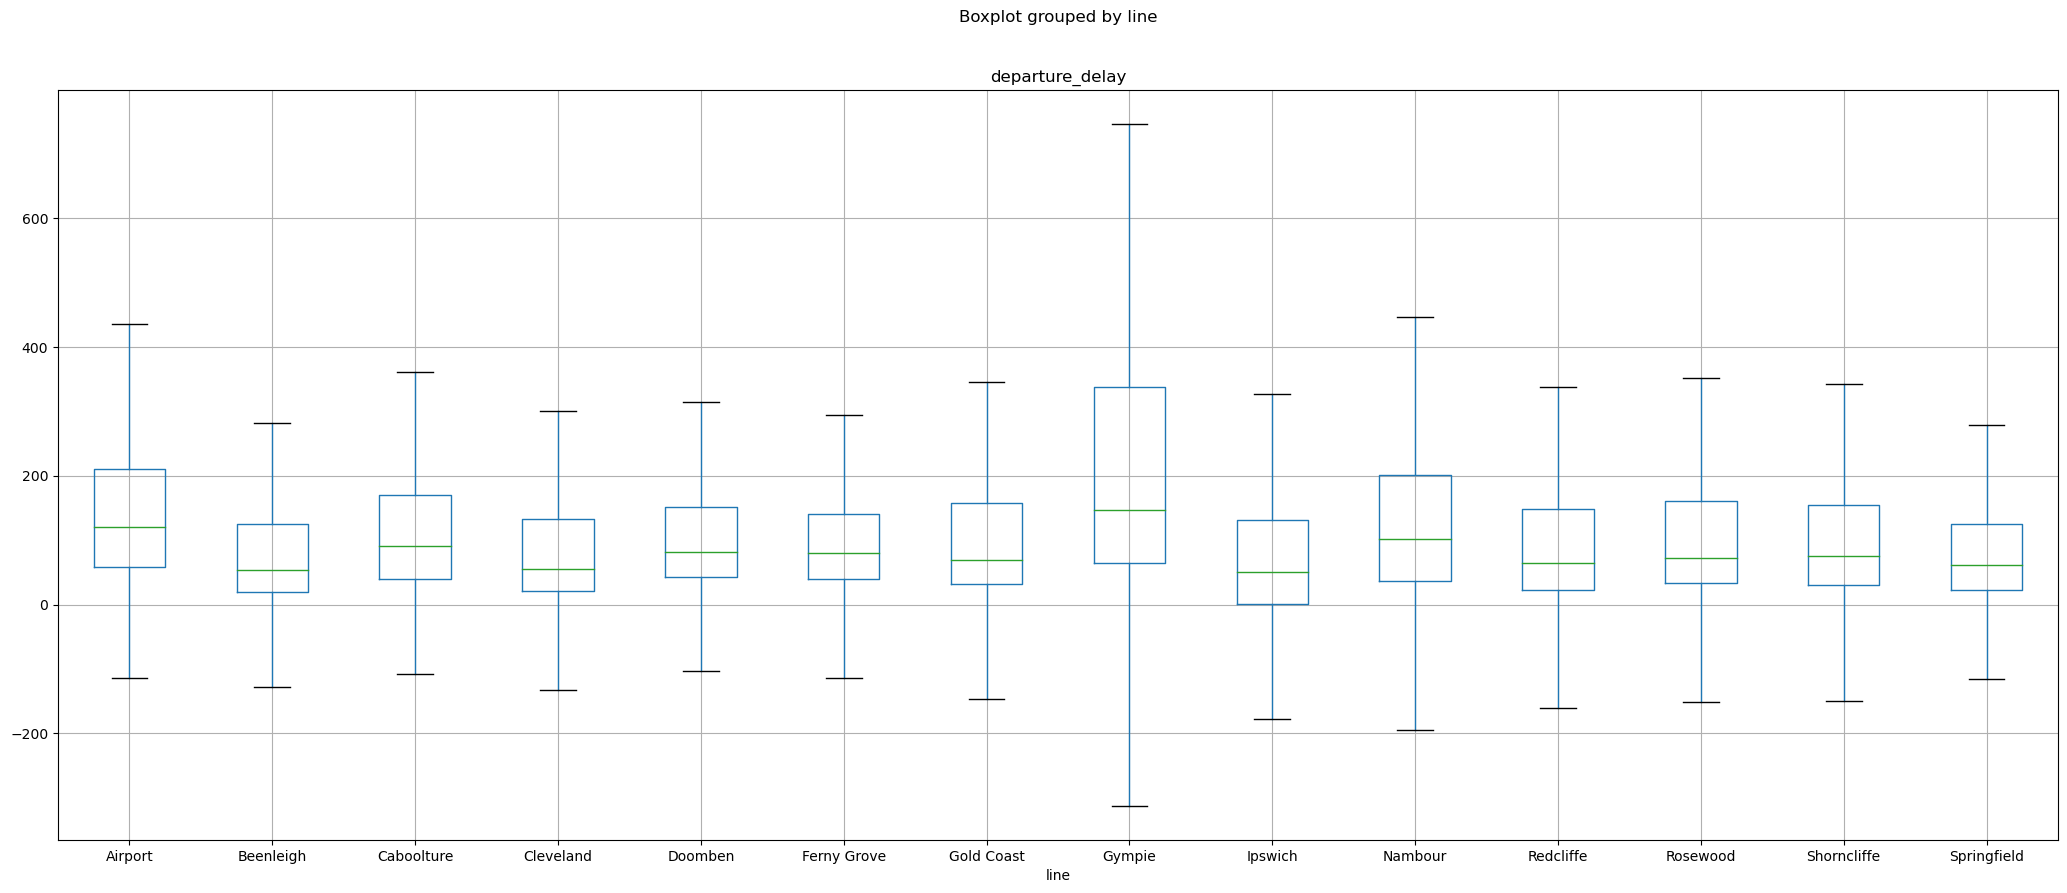

In [17]:
plot = train_times.boxplot(column='departure_delay', by='line', figsize=(25,10), showfliers=False)

# 9. Create a pie chart to summarize the number of train stations on each train line.

line
Airport        12
Beenleigh      28
Caboolture     25
Cleveland      25
Doomben        14
Ferny Grove    18
Gold Coast     16
Gympie         23
Ipswich        26
Nambour        22
Redcliffe      22
Rosewood       32
Shorncliffe    21
Springfield    18
Name: stop_name, dtype: int64

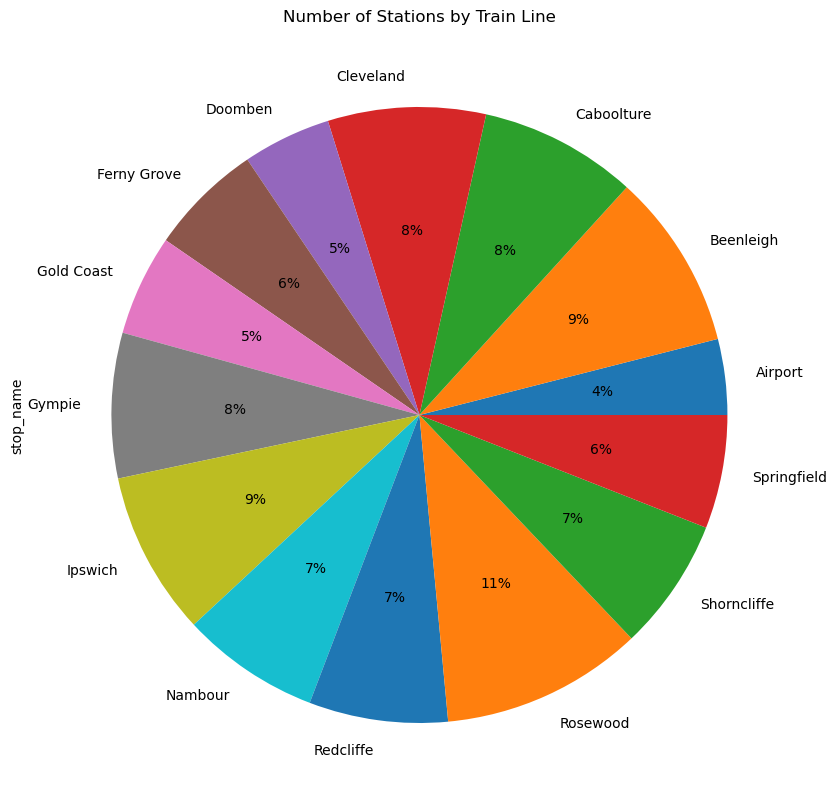

In [18]:
stops_per_line = train_times.groupby('line').stop_name.nunique()
stops_per_line.plot.pie(figsize=(10,10), autopct='%.0f%%', title='Number of Stations by Train Line')
stops_per_line

# 10. Which train station is closest to where you live? 

Which trip departs from that station on Tuesday morning around 9am?  

At precisely what time is it *scheduled* to depart? When did it actually depart?

In [19]:
train_times['scheduled_departure'] = convert_timestamp(train_times.departure_timestamp - train_times.departure_delay)
my_stop = train_times[(train_times.stop_name == 'Oxford Park') & (train_times.departure_time.dt.dayofweek == 1) & (train_times.departure_time.dt.time.between(datetime.time(8,30), datetime.time(9,30)))].sort_values('scheduled_departure')
my_stop

,line,trip_id,stop_name,arrival_timestamp,arrival_delay,departure_timestamp,departure_delay,arrival_time,departure_time,scheduled_departure
18048,Ferny Grove,23662336-QR 22_23-32817-1E31,Oxford Park,1.678747e+09,84.0,1.678747e+09,119.0,2023-03-14 08:35:24+10:00,2023-03-14 08:35:59+10:00,2023-03-14 08:34:00+10:00
67305,Ferny Grove,23662205-QR 22_23-32817-1722,Oxford Park,1.678747e+09,-5.0,1.678747e+09,69.0,2023-03-14 08:39:55+10:00,2023-03-14 08:41:09+10:00,2023-03-14 08:40:00+10:00
17982,Ferny Grove,23662295-QR 22_23-32817-1E33,Oxford Park,1.678748e+09,131.0,1.678748e+09,161.0,2023-03-14 08:51:11+10:00,2023-03-14 08:51:41+10:00,2023-03-14 08:49:00+10:00
67321,Ferny Grove,23662285-QR 22_23-32817-1V16,Oxford Park,1.678748e+09,-11.0,1.678748e+09,52.0,2023-03-14 08:54:49+10:00,2023-03-14 08:55:52+10:00,2023-03-14 08:55:00+10:00
18118,Ferny Grove,23662940-QR 22_23-32817-TE35,Oxford Park,1.678749e+09,239.0,1.678749e+09,305.0,2023-03-14 09:07:59+10:00,2023-03-14 09:09:05+10:00,2023-03-14 09:04:00+10:00
67417,Ferny Grove,23662337-QR 22_23-32817-1724,Oxford Park,1.678749e+09,-32.0,1.678749e+09,35.0,2023-03-14 09:09:28+10:00,2023-03-14 09:10:35+10:00,2023-03-14 09:10:00+10:00
17997,Ferny Grove,23662306-QR 22_23-32817-1E37,Oxford Park,1.678750e+09,317.0,1.678750e+09,378.0,2023-03-14 09:24:17+10:00,2023-03-14 09:25:18+10:00,2023-03-14 09:19:00+10:00
67341,Ferny Grove,23662296-QR 22_23-32817-1V18,Oxford Park,1.678750e+09,37.0,1.678750e+09,98.0,2023-03-14 09:25:37+10:00,2023-03-14 09:26:38+10:00,2023-03-14 09:25:00+10:00


Scheduled to depart at 8:56:44am, actually departed at 8:55:52am (35 seconds late)